- Aim of the project- To find the model that  has high accuracy in predicting customers that are more likely to subscribe to term deposit.  We will then focus on those customers for marketing purposes and reduce spending on advertising.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df.shape

(11162, 17)

In [4]:
df.info()#display data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:

df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
len(df.columns)

17

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


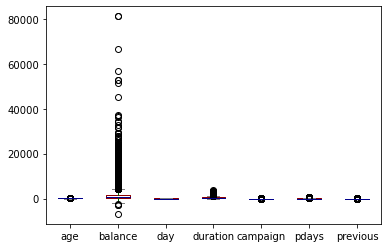

In [8]:
#Checking Outliers

color = dict(boxes='DarkRed', whiskers='DarkGreen',\
              medians='DarkBlue', caps='Gray')
df.plot(kind='box', color = color)
plt.show()

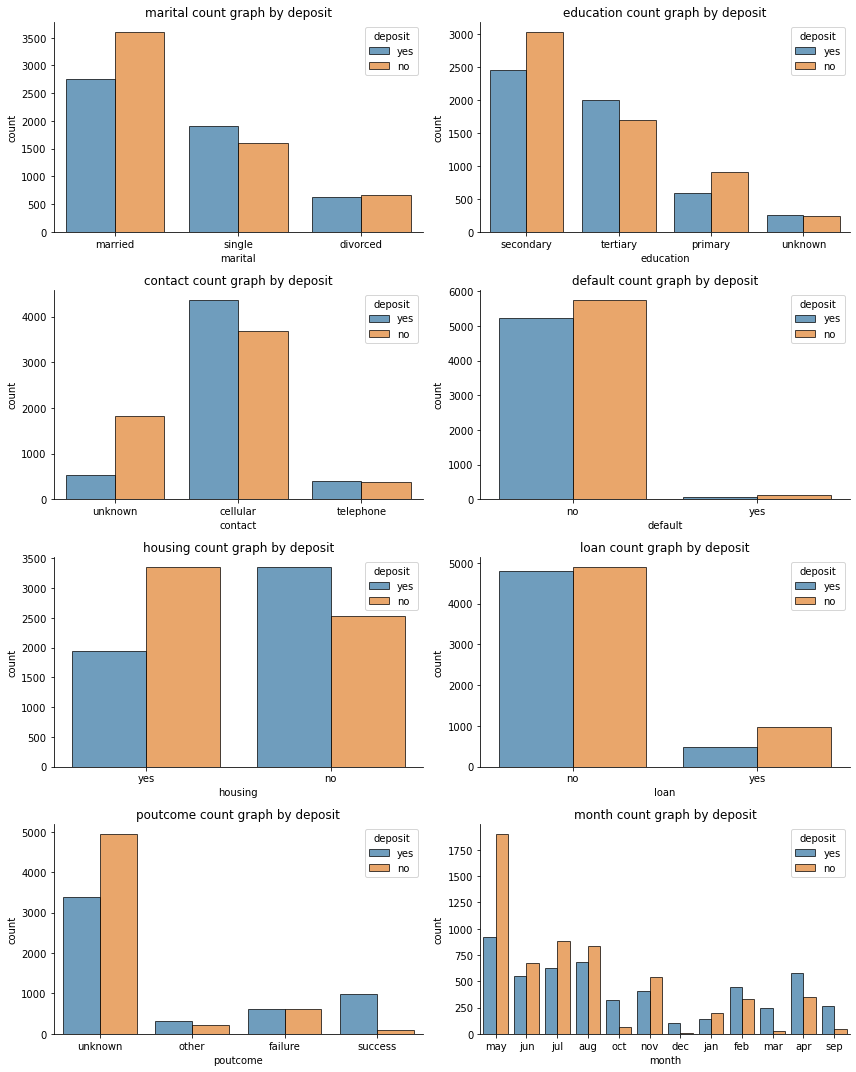

In [9]:
Attributes=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
plt.figure(figsize=[12,15])
n=1
for f in Attributes:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='deposit', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("{} count graph by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()



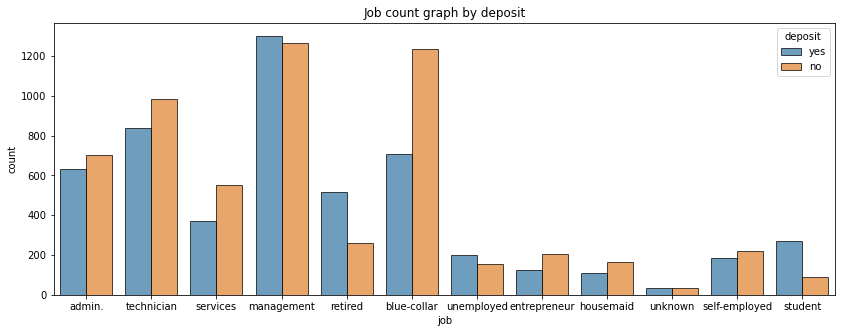

In [10]:
plt.figure(figsize=[14,5])
sns.countplot(x='job', hue='deposit',edgecolor="black", alpha=0.7, data=df)
plt.title("Job count graph by deposit")
plt.show()

In [11]:
df['deposit'].value_counts(normalize =True)#display proportions of target valuables

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

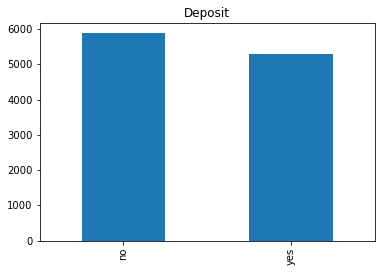

In [46]:
deposit_Counts= df['deposit'].value_counts()
deposit_Label=deposit_Counts.plot.bar(title = 'Deposit')
deposit_Label.set_xticklabels(['no','yes'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

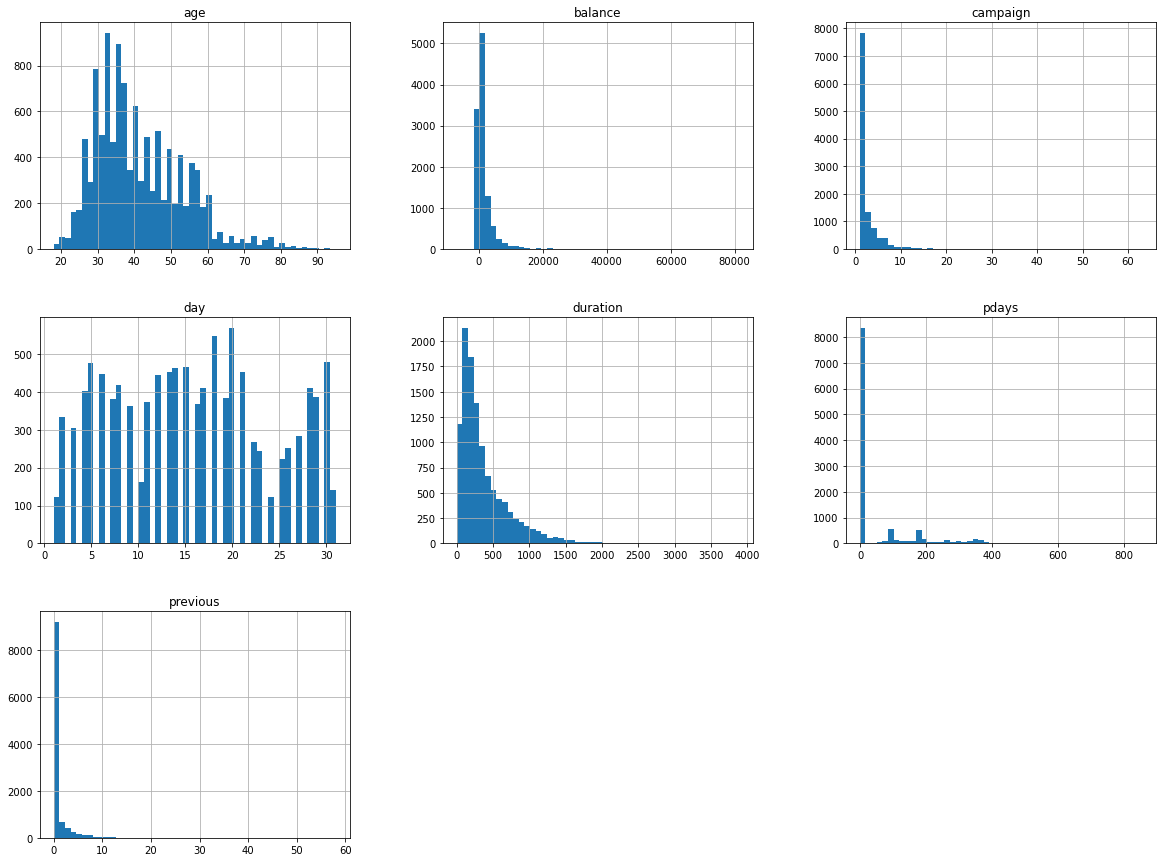

In [13]:
# finding skewness distribution

%matplotlib inline 

df.hist(bins = 50, figsize = (20, 15))
plt.show()

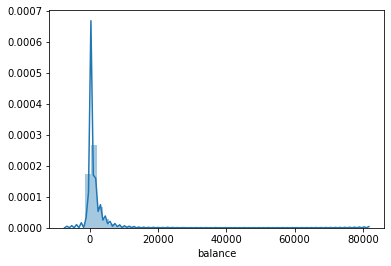

In [14]:
#Skewness transformation

sns.distplot(df["balance"])

In [15]:
from sklearn.preprocessing import PowerTransformer
log =PowerTransformer()#handling positive skewness
log.fit(df[["balance"]])
df["log_balance"]=log.transform(df[["balance"]])

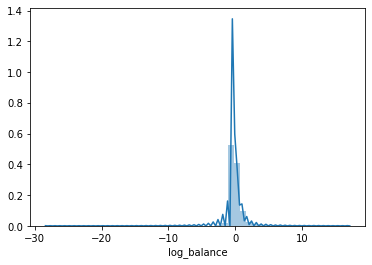

In [16]:
sns.distplot(df["log_balance"])

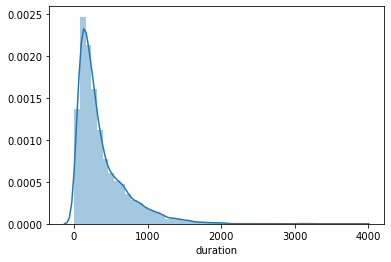

In [17]:
sns.distplot(df["duration"])

In [18]:
log =PowerTransformer()
log.fit(df[["duration"]])#handling positive skewness
df["log_duration"]=log.transform(df[["duration"]])

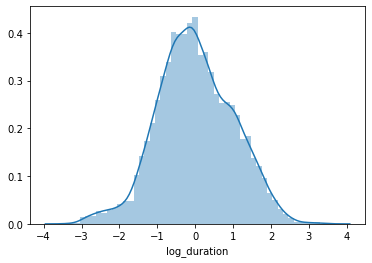

In [19]:
sns.distplot(df["log_duration"])

In [20]:
#Converting categorical variables to numericals

cat_columns = ["default","housing","loan","contact","month","poutcome","deposit","job","marital","education"]#converting categorical to numerical
le =LabelEncoder()
for col in cat_columns:
    df[col]=le.fit_transform(df[col])

In [21]:
df.drop([ 'duration',"balance"], axis = 1,inplace=True)

In [22]:

x = df.drop(["deposit"],axis=1)
y = df[["deposit"]]


In [23]:
df

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,log_balance,log_duration
0,59,0,1,1,0,1,0,2,5,8,1,-1,0,3,1,0.397351,1.632491
1,56,0,1,1,0,0,0,2,5,8,1,-1,0,3,1,-0.461562,2.102216
2,41,9,1,1,0,1,0,2,5,8,1,-1,0,3,1,0.039476,2.025462
3,55,7,1,1,0,1,0,2,5,8,1,-1,0,3,1,0.439568,0.883221
4,54,0,1,2,0,0,0,2,5,8,2,-1,0,3,1,-0.388408,1.068398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,0,0,20,0,1,-1,0,3,0,-0.492279,-0.042719
11158,39,7,1,1,0,0,0,2,16,6,4,-1,0,3,0,-0.157484,-1.143502
11159,32,9,2,1,0,0,0,0,19,1,2,-1,0,3,0,-0.471529,-0.554261
11160,43,9,1,1,0,0,1,0,8,8,2,172,5,0,0,-0.493334,-2.761546


In [24]:
X_train,X_test,y_train,y_test = train_test_split(x,y,stratify =y,test_size =0.3,shuffle =True,random_state =41)

In [45]:
#Data Scaling

scaling =StandardScaler()

scaling.fit_transform(X_train)
scaling.transform(X_test)

array([[ 0.23471492,  0.76587672, -1.92804234, ...,  0.52555268,
        -0.37852405, -0.56573333],
       [ 0.57217229,  1.38295363, -1.92804234, ...,  0.52555268,
        -0.86180761,  0.26820606],
       [-0.44019981, -1.08535401,  1.28899873, ...,  0.52555268,
        -0.01738892,  0.59624966],
       ...,
       [ 0.82526532, -1.08535401, -0.31952181, ...,  0.52555268,
         1.80942356,  2.1139817 ],
       [ 1.33145137,  0.14879981, -0.31952181, ..., -0.46602981,
        -0.04826167,  0.89775766],
       [-0.35583547, -0.15973865, -0.31952181, ...,  0.52555268,
         1.34274709,  1.24825468]])

In [26]:
#Algorithms


#baseline model

test_acc =[]
train_acc=[]
f1 =[]
precision = []
recall =[]
classifiers = [LogisticRegression(max_iter =100000),RandomForestClassifier(),xgb.XGBClassifier(eval_metric="mlogloss"),DecisionTreeClassifier()]

In [198]:
for model in classifiers:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    train_pred =model.predict(X_train)
    test_acc.append(accuracy_score(np.array(y_test),y_pred))
    train_acc.append(accuracy_score(np.array(y_train),train_pred))
    f1.append(f1_score(np.array(y_test),y_pred))
    precision.append(precision_score(np.array(y_test),y_pred))
    recall.append(recall_score(np.array(y_test),y_pred))

In [199]:
#Model Evaluation

new_df =pd.DataFrame()
new_df ["Train Accuracy"]=train_acc
new_df["Test Accuracy"]=test_acc
new_df["F1_score"]=f1
new_df["precision"]=precision
new_df["Recall"]=recall
new_df.index=["LR","RF","XG","DT"]
new_df

,Train Accuracy,Test Accuracy,F1_score,precision,Recall
LR,0.791885,0.794566,0.782828,0.784314,0.781348
RF,1.000000,0.853090,0.849449,0.825699,0.874606
XG,0.970178,0.847417,0.840959,0.830873,0.851292
DT,1.000000,0.781726,0.768304,0.772959,0.763705


In [222]:
#fine tuning the parameters
test_acc =[]
train_acc=[]
f1 =[]
precision = []
recall =[]
classifiers = [LogisticRegression(max_iter =100000,class_weight ="balanced"),RandomForestClassifier(n_estimators =40,max_depth=10,random_state = 42,class_weight ="balanced"),xgb.XGBClassifier(eval_metric="mlogloss",n_estimators =20,max_depth=7),DecisionTreeClassifier(criterion="entropy", max_depth=10)]

In [202]:
for model in classifiers:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    train_pred =model.predict(X_train)
    test_acc.append(accuracy_score(np.array(y_test),y_pred))
    train_acc.append(accuracy_score(np.array(y_train),train_pred))
    f1.append(f1_score(np.array(y_test),y_pred))
    precision.append(precision_score(np.array(y_test),y_pred))
    recall.append(recall_score(np.array(y_test),y_pred))

In [203]:
new_df =pd.DataFrame()
new_df ["Train Accuracy"]=train_acc
new_df["Test Accuracy"]=test_acc
new_df["F1_score"]=f1
new_df["precision"]=precision
new_df["Recall"]=recall
new_df.index=["LR","RF","XG","DT"]
new_df

,Train Accuracy,Test Accuracy,F1_score,precision,Recall
LR,0.793293,0.794267,0.786621,0.773447,0.800252
RF,0.894407,0.839654,0.836031,0.811019,0.862634
XG,0.916677,0.851896,0.847008,0.829607,0.865154
DT,0.883143,0.822036,0.812932,0.809881,0.816005


In [209]:
#Checking which features are important for further study

classifiers[1].feature_importances_

array([0.05855535, 0.01992891, 0.01203564, 0.01183286, 0.00114063,
       0.05082851, 0.00739024, 0.05218964, 0.04319342, 0.07226449,
       0.02452401, 0.06513308, 0.02667417, 0.04576441, 0.05087662,
       0.45766803])

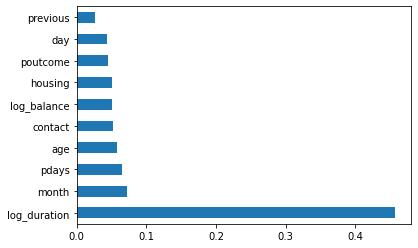

In [210]:
feat_importances = pd.Series(classifiers[1].feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [212]:
classifiers[2].feature_importances_

array([0.02569697, 0.01786882, 0.01927103, 0.02422725, 0.01097377,
       0.09730529, 0.03742879, 0.18261309, 0.02893783, 0.06171551,
       0.03475331, 0.07892953, 0.01838511, 0.17681634, 0.02500915,
       0.16006823], dtype=float32)

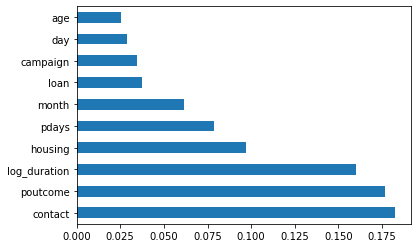

In [213]:
feat_importances = pd.Series(classifiers[2].feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

- Considered recall, precision and f1 scores as accuracy metrics. when I performed baseline models random forest,xg boost, decision trees accuracies looks like they are overfittiong.After fine tuning the parameters random forest train accuracy came down to 89% from 1 and test accuracy decreased from 84.5 to 83.9%,whereas xg boost accuracy variation  between train and test data reduced after fine tuning the parameters. Using Decision trees and entropy as parameter and max_depth=10, train accuracy came down to 88% from 1 and test accuracy increased to 82% from 78%.After considering all metrics  came to conclusion that XG boost and random forest worked well on  dataset.